In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dietary-compositions.csv to dietary-compositions.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving alltablesGEcrops.csv to alltablesGEcrops.csv


In [0]:
df_land = pd.read_csv('LandPrice.csv')

In [0]:
df_land.head()

,Year,Value per Acre
0,1980,737
1,1981,734
2,1982,730
3,1983,725
4,1984,720


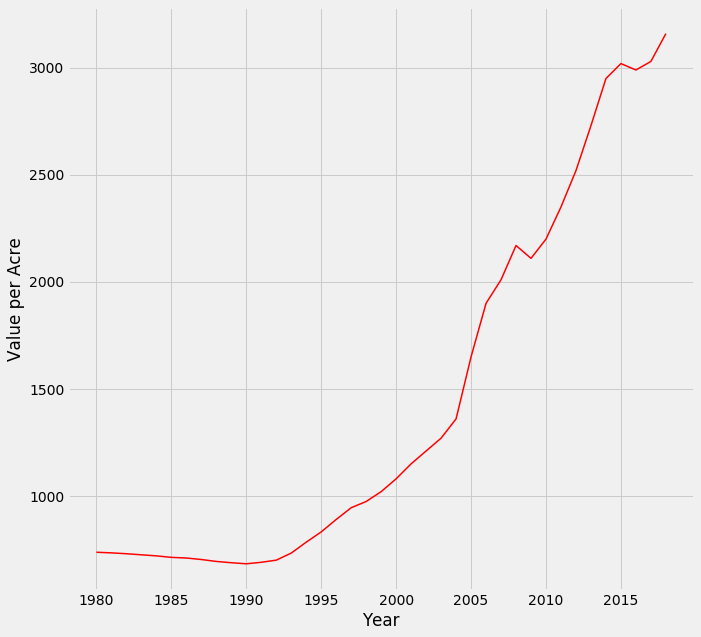

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10,10))

  sns.lineplot(data=df_land, x='Year', y='Value per Acre', ax=ax, lw=1.5, 
               color='r')

In [0]:
df_GE = pd.read_csv('alltablesGEcrops.csv')

In [0]:
df_GE.Crop.value_counts()

Corn        1200
Cotton       960
Soybeans     640
Name: Crop, dtype: int64

In [0]:
df_GE['Year'].value_counts()

2019    140
2017    140
2002    140
2004    140
2006    140
2008    140
2010    140
2012    140
2014    140
2016    140
2018    140
2001    140
2003    140
2005    140
2007    140
2009    140
2011    140
2013    140
2015    140
2000    140
Name: Year, dtype: int64

In [0]:
df_ge_us = df_GE[df_GE['State'] == 'U.S.']

In [0]:
all_ge = df_ge_us[df_ge_us['Variety'].str.contains('All GE varieties')]

In [0]:
df_ge_us['Crop'].value_counts()

Cotton      80
Corn        80
Soybeans    40
Name: Crop, dtype: int64

In [0]:
all_ge = all_ge.drop(['Crop title', 'State', 'Unit', 'Variety'], axis=1)

In [0]:
all_ge['Year'] = all_ge['Year'].astype(float)
all_ge['Value'] = all_ge['Value'].astype(float)

In [0]:
all_ge.dtypes

Crop      object
Year     float64
Value    float64
dtype: object

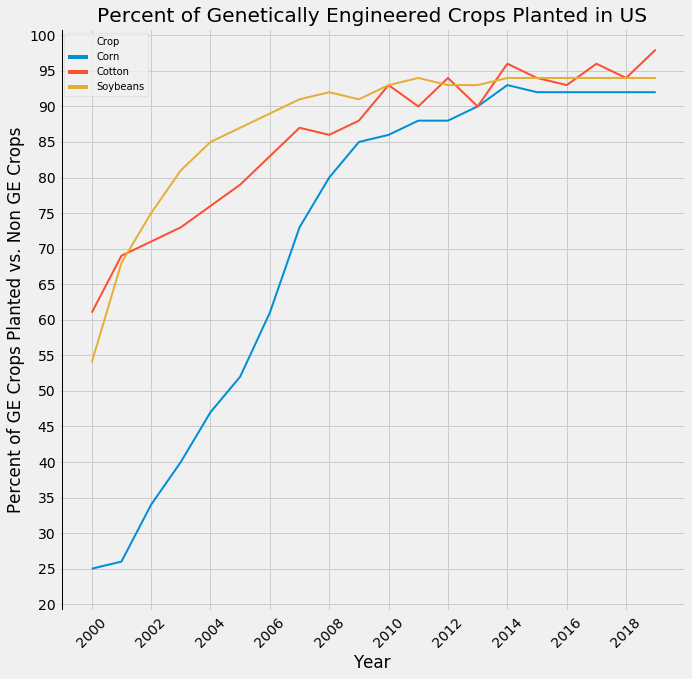

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.lineplot(data=all_ge, x='Year', y='Value', hue='Crop', lw= 2)
  ax.set_xticks(range(2000, 2020, 2))
  ax.set_xticklabels(range(2000, 2020, 2), rotation=45)
  ax.set_xlim(1998.9, 2020)
  ax.set_ylim(19, 101)
  ax.axvline(x=1999, lw=1, color='black')
  ax.set_yticks(range(20,101, 5))
  ax.legend(fontsize=10)
  ax.set_title('Percent of Genetically Engineered Crops Planted in US')
  ax.set_ylabel('Percent of GE Crops Planted vs. Non GE Crops')

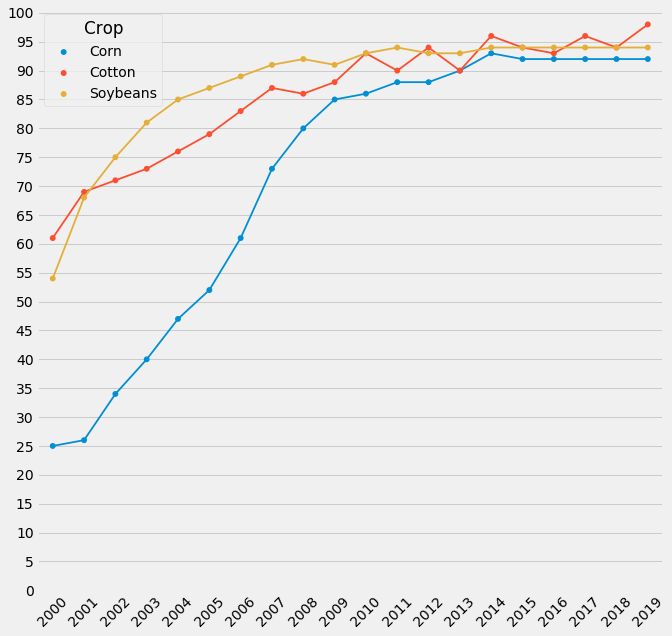

In [0]:
with plt.style.context('fivethirtyeight'):
  x = all_ge['Year'].values
  y = all_ge['Value'].values
  hue = all_ge['Crop']
  fig, ax = plt.subplots(figsize=(10,10))
  sns.pointplot(x=x, y=y, hue=hue, ax=ax, ci=0, linestyles='-', scale=.25)
  ax.set_xticklabels(range(2000, 2020, 1), rotation=45)
  # ax.set_xlim(1998.9, 2020)
  ax.set_ylim(20, 101)
  ax.axvline(x=-.5, lw=1, color='black')
  ax.set_yticks(range(0,101, 5))
  # ax.legend(fontsize=10)
  # ax.set_title('Percent of Genetically Engineered Crops Planted')
  # ax.set_ylabel('Percent of GE Crops Planted vs. Non GE Crops')

In [0]:
df_diet = pd.read_csv('dietary-compositions.csv')

In [0]:
df_diet.head()

,Entity,Code,Year,Other (kilocalories per person per day),Sugar (kilocalories per person per day),Oils & Fats (kilocalories per person per day),Meat (kilocalories per person per day),Dairy & Eggs (kilocalories per person per day),Fruits & Vegetables (kilocalories per person per day),Starchy Roots (kilocalories per person per day),Pulses (kilocalories per person per day),Cereals & Grains (kilocalories per person per day),Alcoholic Beverages (kcal/person/day)
0,Afghanistan,AFG,1961,13,51,92,88,102,82,25,16,2530,0.0
1,Afghanistan,AFG,1962,12,45,98,88,101,76,22,17,2458,0.0
2,Afghanistan,AFG,1963,13,47,106,91,110,79,23,17,2212,0.0
3,Afghanistan,AFG,1964,11,55,102,93,110,95,24,18,2445,0.0
4,Afghanistan,AFG,1965,13,57,105,95,118,95,24,18,2431,0.0


In [0]:
df_diet = df_diet[df_diet['Entity'] == 'United States']

In [0]:
!unzip Project.zip

Archive:  Project.zip
  inflating: Cattle.csv              
  inflating: ImportExport.csv        
  inflating: NetValueSomeItems.csv   
  inflating: Poultry.csv             
  inflating: Top10produced.csv       
  inflating: Top10yield.csv          
  inflating: USPOP.csv               
  inflating: Agriculture.csv         
  inflating: BigImportExport.csv     
  inflating: Imports.csv             


In [0]:
df_ag = pd.read_csv('Agriculture.csv', skipfooter=5)
df_big_imp_exp = pd.read_csv('BigImportExport.csv')
df_cat = pd.read_csv('Cattle.csv', skipfooter=2)
df_imp_exp = pd.read_csv('ImportExport.csv')
df_net_val = pd.read_csv('NetValueSomeItems.csv')
df_poultry = pd.read_csv('Poultry.csv', skipfooter=3)
df_prod = pd.read_csv('Top10produced.csv')
df_yield = pd.read_csv('Top10yield.csv')
df_pop = pd.read_csv('USPOP.csv')
df_imports = pd.read_csv('Imports.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [0]:
df_ag = df_ag.drop(['Country or Area', 'Element', 'Value Footnotes'], axis=1)
df_ag.head()

,Year,Unit,Value
0,2016,1000 ha,405862.5
1,2015,1000 ha,405862.5
2,2014,1000 ha,407865.5
3,2013,1000 ha,405841.7
4,2012,1000 ha,408706.5


In [0]:
df_big_imp_exp = df_big_imp_exp.drop(['Domain', 'Area'], axis=1)
df_big_imp_exp.head()

,Element,Item,Year,Unit,Value
0,Import Quantity,Bananas and plantains,1961,tonnes,1565350
1,Import Quantity,Bananas and plantains,1962,tonnes,1311330
2,Import Quantity,Bananas and plantains,1963,tonnes,1378470
3,Import Quantity,Bananas and plantains,1964,tonnes,1448320
4,Import Quantity,Bananas and plantains,1965,tonnes,1565339


In [0]:
df_imp = df_big_imp_exp[df_big_imp_exp['Element']=='Import Quantity']
df_exp = df_big_imp_exp[df_big_imp_exp['Element']=='Export Quantity']

In [0]:
df_imp['Item'].value_counts()

Onions                    56
Bananas and plantains     56
Butter                    56
Tobacco                   56
Cereals                   56
Beer                      56
Poultry Meat              56
Cheese and Curd           56
Rice                      56
Fodder & Feeding stuff    56
Name: Item, dtype: int64

In [0]:
df_cat = df_cat.drop(['Country or Area', 'Value Footnotes'], axis=1)
df_cat.head()

,Element,Year,Unit,Value
0,Producing Animals/Slaughtered,2017,Head,32817400.0
1,Producing Animals/Slaughtered,2016,Head,31188800.0
2,Producing Animals/Slaughtered,2015,Head,29320300.0
3,Producing Animals/Slaughtered,2014,Head,30857300.0
4,Producing Animals/Slaughtered,2013,Head,33352500.0


In [0]:
df_imp_exp = df_imp_exp.drop(['Country', 'Domain'], axis=1)
df_imp_exp.head()

KeyError: ignored

In [0]:
df_imp = df_imp_exp[df_imp_exp['Element']=='Import Quantity']
df_exp = df_imp_exp[df_imp_exp['Element']=='Export Quantity']

In [0]:
df_net_val = df_net_val.drop(['Domain', 'Area', 'Element'], axis=1)
df_net_val.head()

,Item,Year,Unit,Value
0,Maize,1961,1000 Int. $,1.348792e+06
1,Maize,1962,1000 Int. $,1.577297e+06
2,Maize,1963,1000 Int. $,3.599425e+06
3,Maize,1964,1000 Int. $,1.861477e+06
4,Maize,1965,1000 Int. $,2.622774e+06


In [0]:
df_poultry = df_poultry.drop(['Country or Area', 'Value Footnotes'], axis=1)
df_poultry.head()

,Element,Year,Unit,Value
0,Producing Animals/Slaughtered,2017,1000 Head,9319021.0
1,Producing Animals/Slaughtered,2016,1000 Head,9179509.0
2,Producing Animals/Slaughtered,2015,1000 Head,9082830.0
3,Producing Animals/Slaughtered,2014,1000 Head,8932613.0
4,Producing Animals/Slaughtered,2013,1000 Head,8912735.0


In [0]:
df_prod = df_prod.drop(['Domain', 'Area'], axis=1)
df_prod.head()

,Element,Item,Year,Unit,Value
0,Production,Maize,1961,tonnes,91388000
1,Production,Maize,1962,tonnes,91604000
2,Production,Maize,1963,tonnes,102093008
3,Production,Maize,1964,tonnes,88504000
4,Production,Maize,1965,tonnes,104216928


In [0]:
df_yield = df_yield.drop(['Domain', 'Area'], axis=1)
df_yield.head()

,Element,Item,Year,Unit,Value
0,Yield,Maize,1961,hg/ha,39184
1,Yield,Maize,1962,hg/ha,40621
2,Yield,Maize,1963,hg/ha,42596
3,Yield,Maize,1964,hg/ha,39498
4,Yield,Maize,1965,hg/ha,46492


In [0]:
df_yield = df_yield.rename({'Item':'Crop'}, axis=1)

In [0]:
df_yield.head(50)

,Element,Crop,Year,Unit,Value
0,Yield,Maize,1961,hg/ha,39184
1,Yield,Maize,1962,hg/ha,40621
2,Yield,Maize,1963,hg/ha,42596
3,Yield,Maize,1964,hg/ha,39498
4,Yield,Maize,1965,hg/ha,46492
5,Yield,Maize,1966,hg/ha,45892
6,Yield,Maize,1967,hg/ha,50265
7,Yield,Maize,1968,hg/ha,49891
8,Yield,Maize,1969,hg/ha,53908
9,Yield,Maize,1970,hg/ha,45439


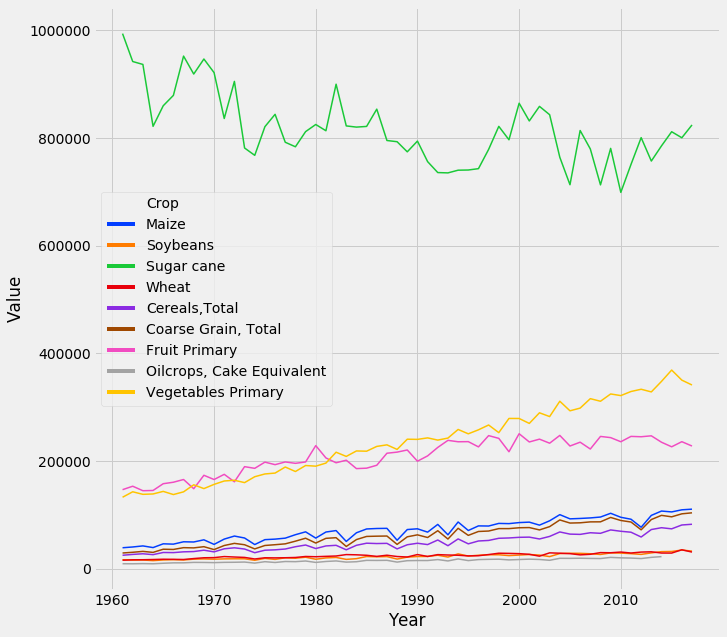

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10,10))

  sns.lineplot(data=df_yield, x='Year', y='Value', hue='Crop', ax=ax, lw=1.5, 
               palette='bright')

In [0]:
df_pop['DATE'] = df_pop['DATE'].str.replace('-01-01', '').astype(float)
df_pop = df_pop.rename(columns={'DATE':'Year', 'POPTOTUSA647NWDB':'Population'})
df_pop.head()

,Year,Population
0,1960.0,180671000.0
1,1961.0,183691000.0
2,1962.0,186538000.0
3,1963.0,189242000.0
4,1964.0,191889000.0


In [0]:
df_main = pd.merge(df_pop, df_ag[['Year', 'Value']], how='inner', on='Year')

In [0]:
df_main['Value'] = df_main['Value']*1000

In [0]:
df_main.head()

,Year,Population,Value
0,1961.0,183691000.0,447509000.0
1,1962.0,186538000.0,443991000.0
2,1963.0,189242000.0,441443000.0
3,1964.0,191889000.0,439012000.0
4,1965.0,194303000.0,435873000.0


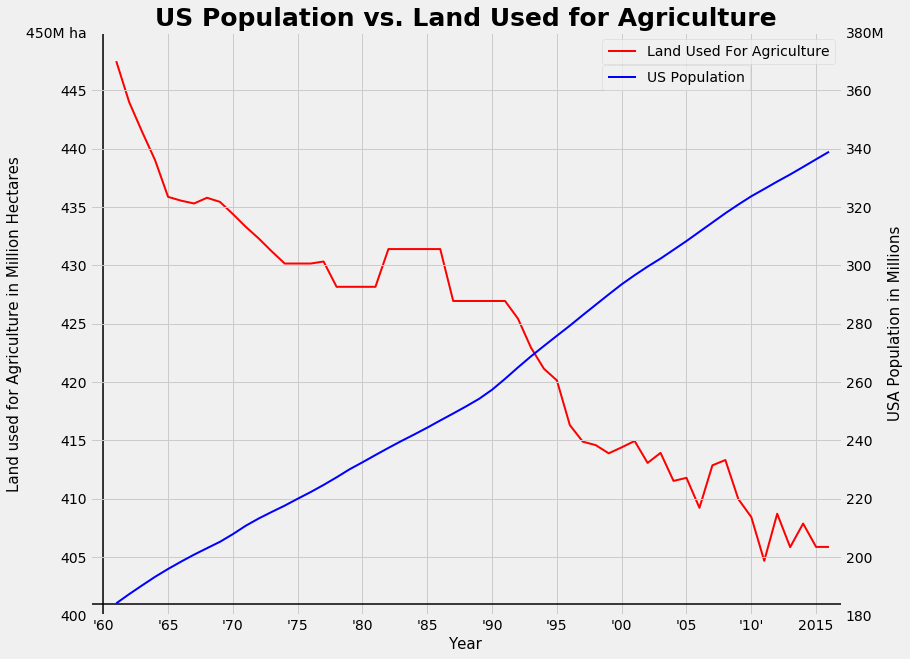

In [0]:
fig, ax = plt.subplots(figsize=(12,10))

plt.style.use('fivethirtyeight')

sns.lineplot(data=df_main, x='Year', y='Value', lw=2, ax=ax, color='Red',
             label='Land Used For Agriculture')
ax2 = plt.twinx()
sns.lineplot(data=df_main, x='Year', y='Population', lw=2, ax=ax2, color='Blue',
             label='US Population')
ax.set_title('US Population vs. Land Used for Agriculture', size=25, 
            fontweight='bold')
ax2.set_yticks(range(180000000,380000000, 18000000))
ax2.set_yticklabels(['180', '200', '220', '240', '260', '280', '300', '320', 
                    '340', '360', '380M'])
ax2.set_ylabel('USA Population in Millions', size=15)

ax.set_yticks(range(400000000, 455000000, 5000000))
ax.set_yticklabels(['400', '405', '410', '415', '420', '425', '430', '435', 
                    '440', '445', '450M ha'])
ax.set_ylabel('Land used for Agriculture in Million Hectares', size=15)
ax.axvline(x=1960, lw=1.5, color='black')
ax.axhline(y=401000000, lw=1.5, color='black')

ax.set_xticks(range(1960, 2016, 5))
ax.set_xticklabels(["'60", "'65", "'70", "'75", "'80", "'85", "'90", "'95", 
                    "'00", "'05", "'10'", "2015"])
ax.set_xlabel('Year', size=15)

ax.set_ylim(400000000, 450000000)
ax.legend(loc=0)
ax2.legend(loc=(.681, .9))
ax2.set_ylim(180000000, 360000000)
ax2.set_xlim(1959, 2017);


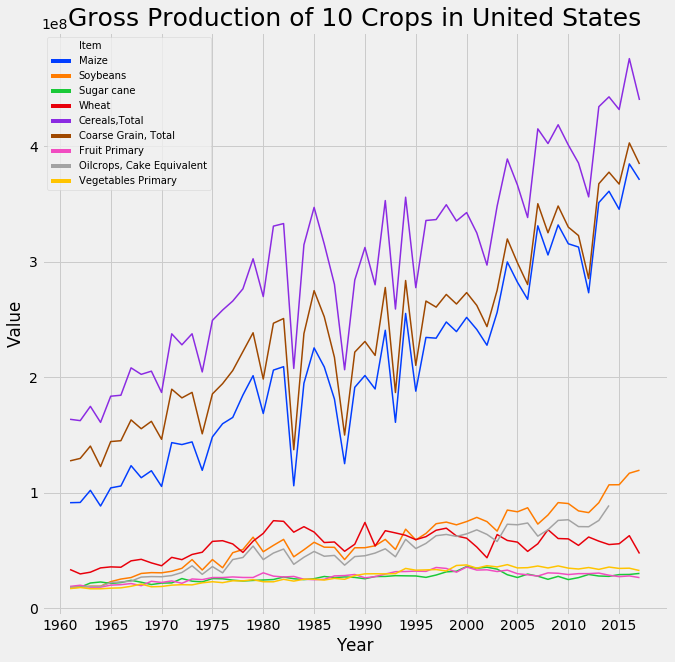

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10,10))
  sns.lineplot(data=df_prod, x='Year', y='Value', hue='Item', lw=1.5, ax=ax, 
               palette='bright')
  ax.set_title('Gross Production of 10 Crops in United States', size=25)
  ax.set_xticks(range(1960, 2016, 5))
  ax.legend(fontsize=10)
  plt.show()

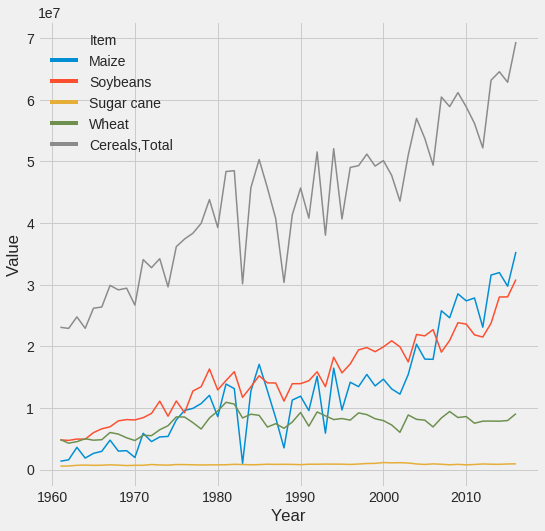

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=df_net_val, x='Year', y='Value', hue='Item', lw=1.5, ax=ax)
plt.show()

In [0]:
fruits = df_imp_exp[df_imp_exp['Item'] == 'Fruits - Excluding Wine']

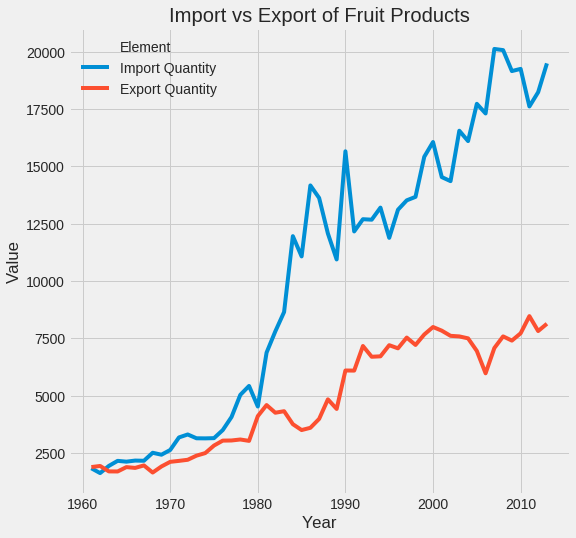

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=fruits, x='Year', y='Value', hue='Element', ax=ax)
ax.set_title('Import vs Export of Fruit Products')
plt.show()

In [0]:
df_imp[(df_imp['Item']=='Fruits - Excluding Wine')]

,Element,Item,Year,Unit,Value
424,Import Quantity,Fruits - Excluding Wine,1961,1000 tonnes,1829
425,Import Quantity,Fruits - Excluding Wine,1962,1000 tonnes,1619
426,Import Quantity,Fruits - Excluding Wine,1963,1000 tonnes,1933
427,Import Quantity,Fruits - Excluding Wine,1964,1000 tonnes,2153
428,Import Quantity,Fruits - Excluding Wine,1965,1000 tonnes,2118
429,Import Quantity,Fruits - Excluding Wine,1966,1000 tonnes,2165
430,Import Quantity,Fruits - Excluding Wine,1967,1000 tonnes,2157
431,Import Quantity,Fruits - Excluding Wine,1968,1000 tonnes,2506
432,Import Quantity,Fruits - Excluding Wine,1969,1000 tonnes,2421
433,Import Quantity,Fruits - Excluding Wine,1970,1000 tonnes,2627


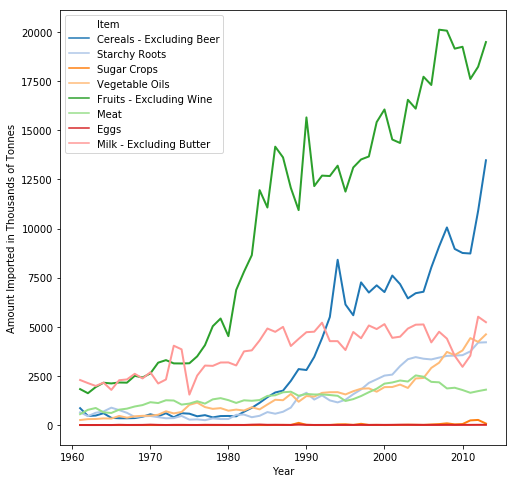

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=df_imp, x='Year', y='Value', hue='Item', lw=2, ax=ax, palette='tab20')
ax.set_ylabel('Amount Imported in Thousands of Tonnes')
plt.show()

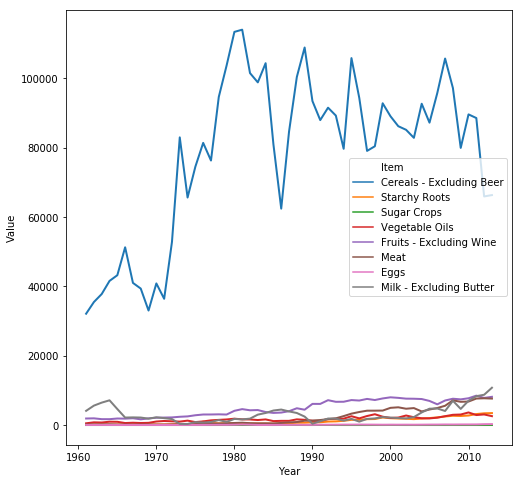

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=df_exp, x='Year', y='Value', hue='Item', lw=2, ax=ax)
plt.show()

In [0]:
cattle_yield = df_cat[df_cat['Element'] == 'Yield/Carcass Weight']
cattle_prod = df_cat[df_cat['Element'] == 'Production']
cattle_total = df_cat[df_cat['Element'] == 'Producing Animals/Slaughtered']

In [0]:
cattle_yield.head()

,Element,Year,Unit,Value
57,Yield/Carcass Weight,2017,hg/An,3628.0
58,Yield/Carcass Weight,2016,hg/An,3678.0
59,Yield/Carcass Weight,2015,hg/An,3676.0
60,Yield/Carcass Weight,2014,hg/An,3791.0
61,Yield/Carcass Weight,2013,hg/An,3535.0


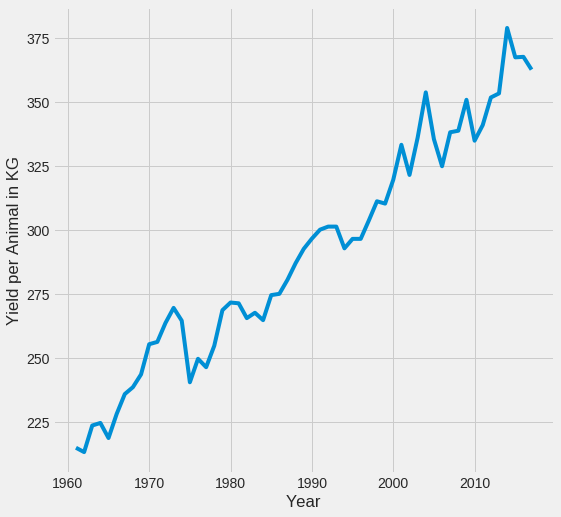

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
y = cattle_yield.Value/10
sns.lineplot(data=cattle_yield, x='Year', y=y, ax=ax)
ax.set_ylabel('Yield per Animal in KG')
plt.show()

In [0]:
cattle_prod.head()

,Element,Year,Unit,Value
114,Production,2017,tonnes,11907239.0
115,Production,2016,tonnes,11470607.0
116,Production,2015,tonnes,10777601.0
117,Production,2014,tonnes,11698116.0
118,Production,2013,tonnes,11788608.0


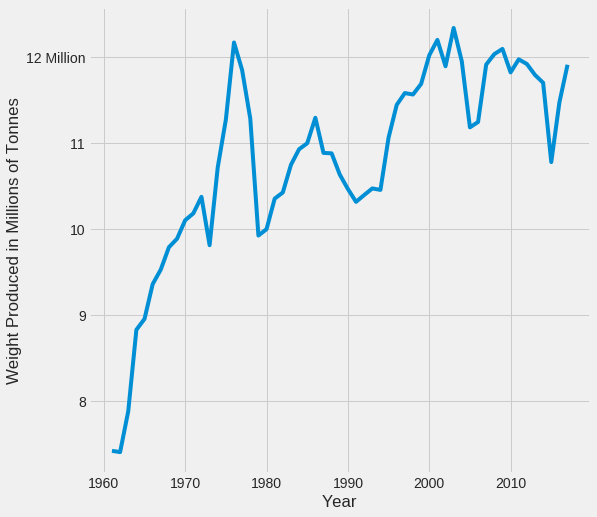

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=cattle_prod, x='Year', y='Value', ax=ax)
ax.set_ylabel('Weight Produced in Millions of Tonnes')
ax.set_yticklabels(['7','8', '9', '10', '11', '12 Million', '13'])
plt.show()

In [0]:
cattle_total.head()

,Element,Year,Unit,Value
0,Producing Animals/Slaughtered,2017,Head,32817400.0
1,Producing Animals/Slaughtered,2016,Head,31188800.0
2,Producing Animals/Slaughtered,2015,Head,29320300.0
3,Producing Animals/Slaughtered,2014,Head,30857300.0
4,Producing Animals/Slaughtered,2013,Head,33352500.0


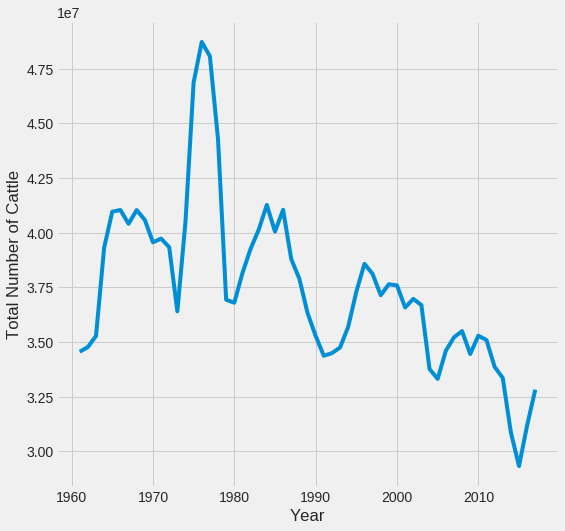

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=cattle_total, x='Year', y='Value', ax=ax)
ax.set_ylabel('Total Number of Cattle')
plt.show()

In [0]:
poultry_yield = df_poultry[df_poultry['Element'] == 'Yield/Carcass Weight']
poultry_prod = df_poultry[df_poultry['Element'] == 'Production']
poultry_total = df_poultry[df_poultry['Element'] == 'Producing Animals/Slaughtered']

In [0]:
poultry_yield.head()

,Element,Year,Unit,Value
57,Yield/Carcass Weight,2017,0.1g/An,23516.0
58,Yield/Carcass Weight,2016,0.1g/An,23403.0
59,Yield/Carcass Weight,2015,0.1g/An,23140.0
60,Yield/Carcass Weight,2014,0.1g/An,22837.0
61,Yield/Carcass Weight,2013,0.1g/An,22535.0


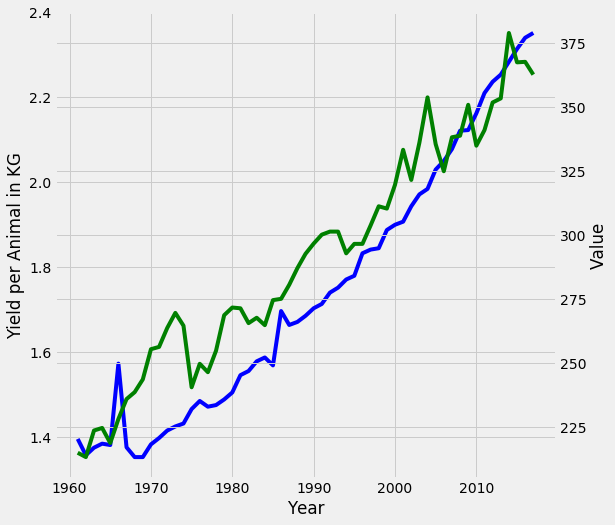

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
y = poultry_yield.Value/10000
sns.lineplot(data=poultry_yield, x='Year', y=y, ax=ax, color='b')
ax2 = plt.twinx()
z = cattle_yield.Value/10
sns.lineplot(data=cattle_yield, x='Year', y=z, ax=ax2, color='g')
ax.set_ylabel('Yield per Animal in KG')

plt.show()

In [0]:
poultry_prod.tail()

,Element,Year,Unit,Value
166,Production,1965,tonnes,3710774.0
167,Production,1964,tonnes,3490707.0
168,Production,1963,tonnes,3365576.0
169,Production,1962,tonnes,3231867.0
170,Production,1961,tonnes,3305175.0


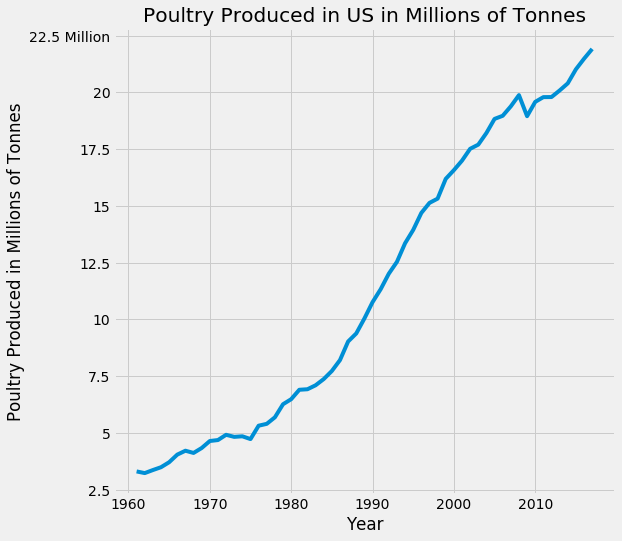

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=poultry_prod, x='Year', y='Value', ax=ax)
ax.set_yticklabels(['0', '2.5', '5', '7.5', '10', '12.5', '15', '17.5', '20', '22.5 Million'])
ax.set_ylabel('Poultry Produced in Millions of Tonnes')
ax.set_title('Poultry Produced in US in Millions of Tonnes')
plt.show()

In [0]:
poultry_total.head()

,Element,Year,Unit,Value
0,Producing Animals/Slaughtered,2017,1000 Head,9319021.0
1,Producing Animals/Slaughtered,2016,1000 Head,9179509.0
2,Producing Animals/Slaughtered,2015,1000 Head,9082830.0
3,Producing Animals/Slaughtered,2014,1000 Head,8932613.0
4,Producing Animals/Slaughtered,2013,1000 Head,8912735.0


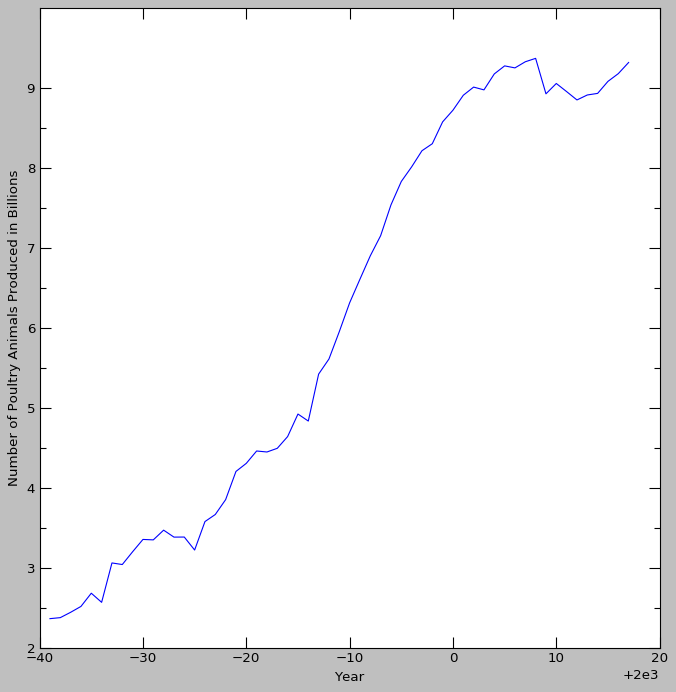

In [0]:
fig, ax = plt.subplots(figsize=(10,10))

y = poultry_total['Value']/1000
sns.lineplot(data=poultry_total, x='Year', y=y, ax=ax)
ax.set_yticks(range(2000, 10000, 1000))
ax.set_yticks(range(2500, 9500, 1000), minor=True)
ax.set_yticklabels(['2', '3', '4', '5', '6', '7', '8', '9'], size=12)
ax.set_ylabel('Number of Poultry Animals Produced in Billions')
ax.tick_params(which='major', width=1.0, length=10)
ax.tick_params(which='minor', width=1.0, length=5)
plt.show()

In [0]:
big_imp = df_big_imp_exp[df_big_imp_exp['Element'] == 'Import Quantity']

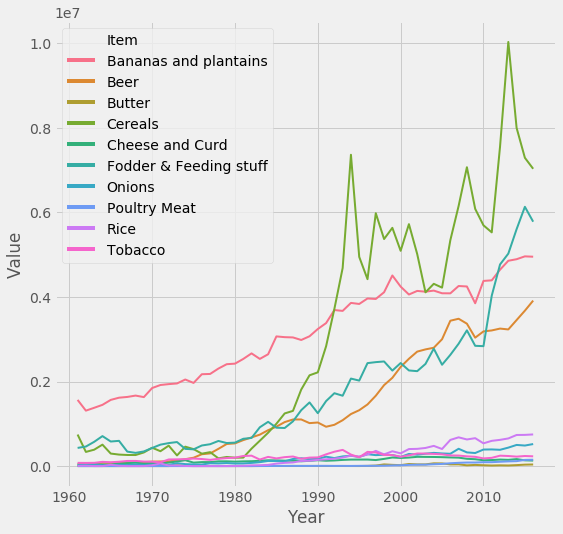

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(data=big_imp, x='Year', y='Value', hue='Item', lw=2, ax=ax)
ax.legend(loc=0, fontsize='medium')
plt.show()

In [0]:
df_imports = df_imports[~df_imports['Item'].str.contains('Fish, Seafood|Stimulants|Sugar & Sweeteners|Meat')]
# df_imports['Value'] = df_imports['Value']*1000

In [0]:
avg_1961 = df_imports[df_imports['Year'] == 1961]
avg_2013 = df_imports[df_imports['Year'] == 2013]

In [0]:
df_imports = df_imports.rename({'Item':'Imported Items'}, axis=1)

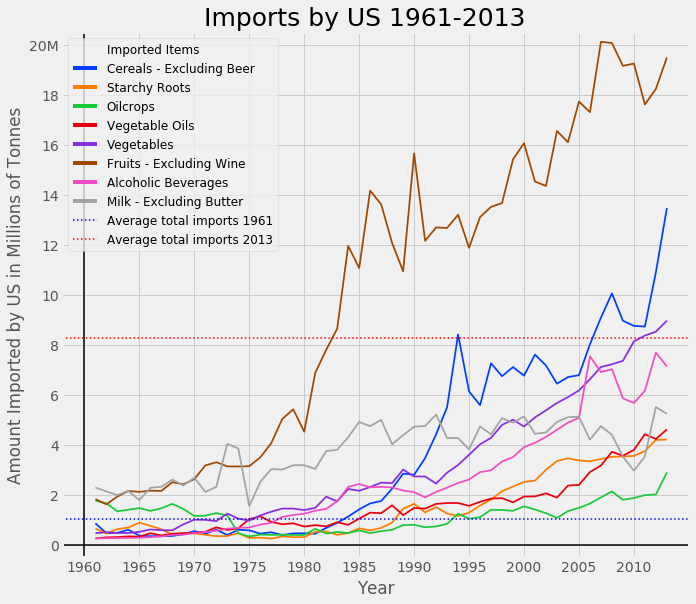

In [0]:
y_1961 = avg_1961['Value'].mean()
y_2013 = avg_2013['Value'].mean()

with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10,9))

 
  sns.lineplot(data=df_imports, x='Year', y='Value', hue='Imported Items', lw=1.75, ax=ax,
               palette='bright')
  fig.suptitle('Imports by US 1961-2013', size=25, y=.92)
  ax.set_xticks(range(1960, 2013, 5))
  ax.set_xticklabels(range(1960, 2013, 5))
  ax.set_xlim(1958, 2015)
  ax.axhline(y=y_1961, color='b', lw=1.5, linestyle=':', label='Average total imports 1961')
  ax.axhline(y=y_2013, color='r', lw=1.5, linestyle=':', label='Average total imports 2013')
  ax.axhline(y=0, lw=1.5, color='black')
  ax.axvline(x=1960, lw=1.5, color='black')
  ax.set_ylabel('Amount Imported by US in Millions of Tonnes')
  ax.set_ylim(-500, 20500)
  ax.set_yticks(range(0, 22000, 2000))
  ax.set_yticklabels(['0','2','4','6','8','10','12','14','16','18','20M'])
  ax.legend(loc=2, fontsize=12)

  plt.show()

In [11]:
df_diet.head()

,Year,Other,Sugar,Oils & Fats,Meat,Dairy & Eggs,Fruits & Vegetables,Starchy Roots,Pulses,Cereals & Grains,Alcoholic Beverages
7708,1961,21,515,532,355,450,144,90,36,628,109.0
7709,1962,21,520,526,359,439,146,87,37,612,111.0
7710,1963,23,509,534,368,440,138,90,37,609,112.0
7711,1964,22,525,558,377,447,138,91,38,616,114.0
7712,1965,24,533,553,367,450,141,90,30,616,118.0


In [0]:
df_diet = df_diet.rename(columns=lambda x: x.replace('(kilocalories per person per day)', ''))
df_diet = df_diet.rename(columns=lambda x: x.replace('(kcal/person/day)', ''))

In [0]:
df_diet = df_diet.drop(['Entity', 'Code'], axis=1)

In [0]:
diet_pivot = df_diet.melt(id_vars='Year', var_name='Item', value_name='Amount')

In [13]:
diet_pivot.tail(50)

,Year,Item,Amount
480,1964,Alcoholic Beverages,114.0
481,1965,Alcoholic Beverages,118.0
482,1966,Alcoholic Beverages,122.0
483,1967,Alcoholic Beverages,125.0
484,1968,Alcoholic Beverages,130.0
485,1969,Alcoholic Beverages,135.0
486,1970,Alcoholic Beverages,143.0
487,1971,Alcoholic Beverages,145.0
488,1972,Alcoholic Beverages,151.0
489,1973,Alcoholic Beverages,156.0


In [0]:
diet_pivot = diet_pivot.rename({'Item':'Food Group'}, axis=1)

In [0]:
df_diet['Mean'] = df_diet.mean(axis=1)

In [0]:
df_diet

,Year,Other,Sugar,Oils & Fats,Meat,Dairy & Eggs,Fruits & Vegetables,Starchy Roots,Pulses,Cereals & Grains,Alcoholic Beverages,Mean
7708,1961,21,515,532,355,450,144,90,36,628,109.0,843.507576
7709,1962,21,520,526,359,439,146,87,37,612,111.0,839.848485
7710,1963,23,509,534,368,440,138,90,37,609,112.0,840.371212
7711,1964,22,525,558,377,447,138,91,38,616,114.0,852.045455
7712,1965,24,533,553,367,450,141,90,30,616,118.0,851.522727
7713,1966,24,533,560,380,453,146,95,29,612,122.0,857.272727
7714,1967,25,544,569,393,439,148,89,31,615,125.0,861.628788
7715,1968,25,549,577,402,438,152,92,30,606,130.0,865.810606
7716,1969,23,562,593,386,437,158,93,38,608,135.0,871.560606
7717,1970,24,566,611,388,438,147,96,29,587,143.0,871.037879


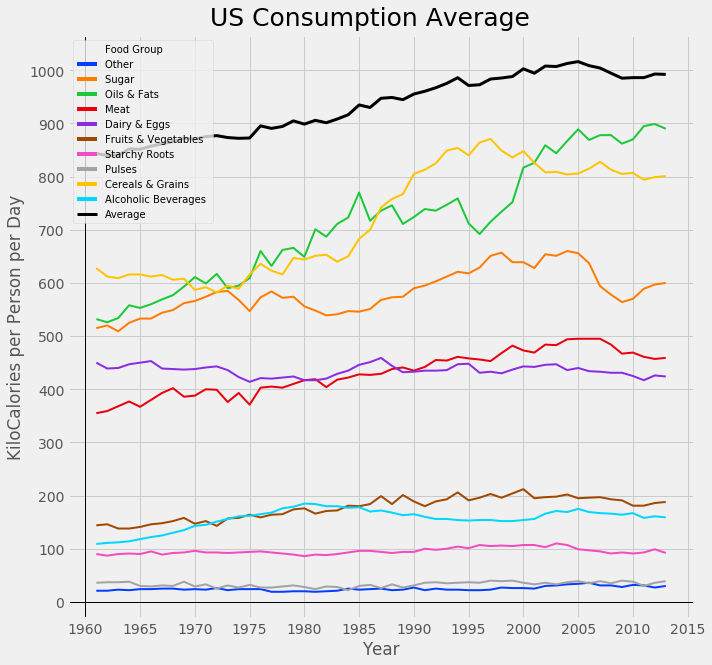

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10,10))
  fig.suptitle('US Consumption Average', size=25, y=.92)
  sns.lineplot(data=diet_pivot, x='Year', y='Amount', hue='Food Group', palette='bright', ax=ax, lw=2)
  sns.lineplot(data=df_diet, x='Year', y='Mean', color='black', lw = 3, label='Average', linestyle='--')
  ax.set_ylabel('KiloCalories per Person per Day')
  ax.set_xticks(range(1960, 2016, 5))
  ax.set_yticks(range(0, 1100, 100))
  ax.axvline(x=1960, lw=1, color='black')
  ax.axhline(y=0, color='black', lw=1)
  ax.legend(loc=0, fontsize=10)
  plt.show()

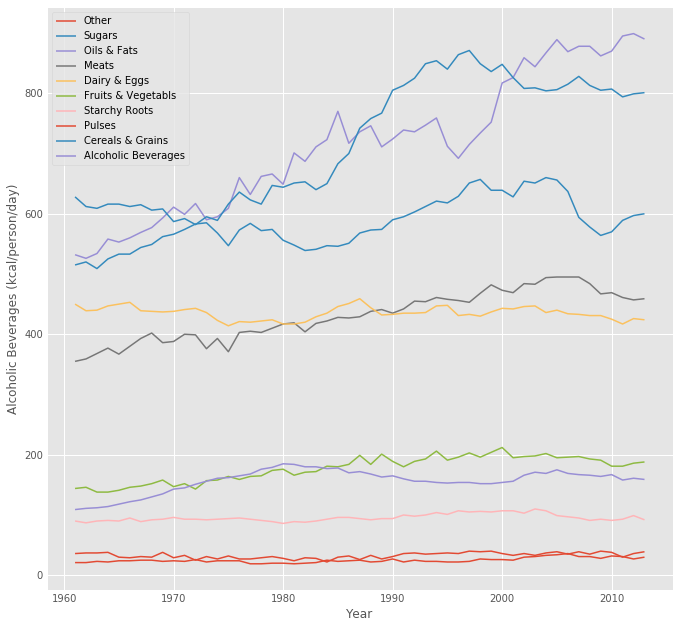

In [0]:
with plt.style.context('ggplot'):
  fig, ax = plt.subplots(figsize=(10,10))

  sns.lineplot(data=df_diet, x='Year', y='Other (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Other')
  sns.lineplot(data=df_diet, x='Year', y='Sugar (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Sugars')
  sns.lineplot(data=df_diet, x='Year', y='Oils & Fats (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Oils & Fats')
  sns.lineplot(data=df_diet, x='Year', y='Meat (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Meats')
  sns.lineplot(data=df_diet, x='Year', y='Dairy & Eggs (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Dairy & Eggs')
  sns.lineplot(data=df_diet, x='Year', y='Fruits & Vegetables (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Fruits & Vegetabls')
  sns.lineplot(data=df_diet, x='Year', y='Starchy Roots (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Starchy Roots')
  sns.lineplot(data=df_diet, x='Year', y='Pulses (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Pulses')
  sns.lineplot(data=df_diet, x='Year', y='Cereals & Grains (kilocalories per person per day)', lw=1.5, ax=ax,
               palette='tab20', label='Cereals & Grains');
  sns.lineplot(data=df_diet, x='Year', y='Alcoholic Beverages (kcal/person/day)', lw=1.5, ax=ax,
               palette='tab20', label='Alcoholic Beverages')
  ax.legend()
  plt.show()